<a href="https://colab.research.google.com/github/ibanetz97/kpi_IDA2025/blob/main/IDA_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import kagglehub
from kagglehub import KaggleDatasetAdapter

path = kagglehub.dataset_download("muratkokludataset/dry-bean-dataset")
print("Dataset downloaded to:", path)

Using Colab cache for faster access to the 'dry-bean-dataset' dataset.
Dataset downloaded to: /kaggle/input/dry-bean-dataset


In [ ]:
file_path = os.path.join(path, "Dry_Bean_Dataset/Dry_Bean_Dataset.xlsx")
df = pd.read_excel(file_path)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y)
# Assuming 'Class' is the target column and others are features
X = df.drop('Class', axis=1)
y = df['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("First 5 rows of scaled features (X_scaled_df):")
print(X_scaled_df.head())
print("\nMean of X_scaled_df features (should be close to 0):")
print(X_scaled_df.mean().head())
print("\nStandard Deviation of X_scaled_df features (should be close to 1):")
print(X_scaled_df.std().head())

First 5 rows of scaled features (X_scaled_df):
       Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0 -0.840749  -1.143319        -1.306598        -0.631153     -1.565053   
1 -0.829188  -1.013924        -1.395911        -0.434445     -1.969784   
2 -0.807157  -1.078829        -1.252357        -0.585735     -1.514291   
3 -0.785741  -0.977215        -1.278825        -0.439290     -1.741618   
4 -0.781239  -1.097384        -1.380471        -0.266663     -2.117993   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0     -2.185720   -0.841451      -1.063341  0.289087  0.367613   1.423867   
1     -3.686040   -0.826102      -1.044217  0.697477 -0.462907   0.231054   
2     -2.045336   -0.808704      -1.008084  0.578195  0.518417   1.252865   
3     -2.742211   -0.773975      -0.973337  0.671260 -2.241767   0.515049   
4     -4.535028   -0.784286      -0.966080  0.476020  0.804772   1.874992   

   Compactness  ShapeFactor1  ShapeFactor2  S

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (10888, 16)
Shape of X_test: (2723, 16)
Shape of y_train: (10888,)
Shape of y_test: (2723,)


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder on y_train and transform both y_train and y_test
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert to one-hot encoding
y_train_one_hot = to_categorical(y_train_encoded)
y_test_one_hot = to_categorical(y_test_encoded)

print("Shape of y_train_one_hot:", y_train_one_hot.shape)
print("Shape of y_test_one_hot:", y_test_one_hot.shape)
print("First 5 rows of y_train_one_hot:\n", y_train_one_hot[:5])
print("Number of classes:", y_train_one_hot.shape[1])

Shape of y_train_one_hot: (10888, 7)
Shape of y_test_one_hot: (2723, 7)
First 5 rows of y_train_one_hot:
 [[0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]]
Number of classes: 7


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Get the number of features from X_train
input_dim = X_train.shape[1]
# Get the number of classes from the one-hot encoded y_train
num_classes = y_train_one_hot.shape[1]

# Initialize the Sequential model
model = Sequential()

# Add the input layer (and first hidden layer)
model.add(Dense(64, input_shape=(input_dim,), activation='relu'))

# Add a second hidden layer
model.add(Dense(32, activation='relu'))

# Add the output layer
model.add(Dense(num_classes, activation='softmax'))

# Print the model summary to display the architecture
print("Neural Network Model Summary:")
model.summary()

Neural Network Model Summary:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,399 (13.28 KB)

 Trainable params: 3,399 (13.28 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("Model compiled successfully with Adam optimizer, categorical_crossentropy loss, and accuracy metric.")

Model compiled successfully with Adam optimizer, categorical_crossentropy loss, and accuracy metric.


In [ ]:
history = model.fit(
    X_train,
    y_train_one_hot,
    epochs=50,  # Number of training epochs
    batch_size=32, # Batch size for training
    validation_data=(X_test, y_test_one_hot), # Validation data
    verbose=1  # Show training progress
)

print("Model training complete.")

Epoch 1/50
341/341 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6679 - loss: 0.9617 - val_accuracy: 0.9122 - val_loss: 0.2522
Epoch 2/50
341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9172 - loss: 0.2368 - val_accuracy: 0.9210 - val_loss: 0.2150
Epoch 3/50
341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9194 - loss: 0.2150 - val_accuracy: 0.9240 - val_loss: 0.2058
Epoch 4/50
341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9230 - loss: 0.1977 - val_accuracy: 0.9258 - val_loss: 0.2042
Epoch 5/50
341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9263 - loss: 0.1973 - val_accuracy: 0.9288 - val_loss: 0.2001
Epoch 6/50
341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9258 - loss: 0.1970 - val_accuracy: 0.9321 - val_loss: 0.1977
Epoch 7/50
341/341 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9300 - loss: 0.1847 - val_accuracy: 0.9269 - val_loss: 0.1969
Epoch 8/50
341/341 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9237 - loss: 0.2034 - val_accuracy: 0.

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Make predictions on the test data
y_pred_one_hot = model.predict(X_test)
y_pred_encoded = np.argmax(y_pred_one_hot, axis=1)

# Inverse transform the encoded predictions and actual test labels to get original class names
y_test_class_names = label_encoder.inverse_transform(y_test_encoded)
y_pred_class_names = label_encoder.inverse_transform(y_pred_encoded)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test_class_names, y_pred_class_names))

86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.93      0.93      0.93       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.95      0.94      0.94       317
    DERMASON       0.91      0.93      0.92       671
       HOROZ       0.97      0.96      0.97       408
       SEKER       0.97      0.94      0.96       413
        SIRA       0.88      0.89      0.89       536

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd # Ensure pandas is imported if not already

# Set the path to the file you'd like to load (this might need adjustment based on dataset structure)
# For image datasets from KaggleHub, typically you download the dataset and then access files within the downloaded directory.
# Let's assume the dataset structure for now and adjust if needed after initial download.

# The dataset_download function returns the path to the downloaded dataset. We will then list its contents.
path = kagglehub.dataset_download("gpiosenka/70-dog-breedsimage-data-set")
print("Dataset downloaded to:", path)

# For image datasets, 'load_dataset' with PANDAS adapter might not directly give image dataframes.
# We will need to inspect the downloaded path for image files.
# Let's list the contents of the downloaded directory to find the image files.
import os

print("\nContents of the downloaded directory:")
for root, dirs, files in os.walk(path):
    for name in files:
        print(os.path.join(root, name))
    for name in dirs:
        print(os.path.join(root, name))


Показано результат, скорочений до останніх рядків (5000).
/kaggle/input/70-dog-breedsimage-data-set/train/Doberman/115.jpg
/kaggle/input/70-dog-breedsimage-data-set/train/Doberman/080.jpg
/kaggle/input/70-dog-breedsimage-data-set/train/Doberman/062.jpg
/kaggle/input/70-dog-breedsimage-data-set/train/Doberman/118.jpg
/kaggle/input/70-dog-breedsimage-data-set/train/Doberman/067.jpg
/kaggle/input/70-dog-breedsimage-data-set/train/Doberman/106.jpg
/kaggle/input/70-dog-breedsimage-data-set/train/Doberman/113.jpg
/kaggle/input/70-dog-breedsimage-data-set/train/Doberman/006.jpg
/kaggle/input/70-dog-breedsimage-data-set/train/Doberman/066.jpg
/kaggle/input/70-dog-breedsimage-data-set/train/Doberman/011.jpg
/kaggle/input/70-dog-breedsimage-data-set/train/Doberman/120.jpg
/kaggle/input/70-dog-breedsimage-data-set/train/Doberman/002.jpg
/kaggle/input/70-dog-breedsimage-data-set/train/Doberman/036.jpg
/kaggle/input/70-dog-breedsimage-data-set/train/Doberman/069.jpg
/kaggle/input/70-dog-breedsimage

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define paths for training, validation, and test directories
train_dir = os.path.join(path, 'train')
valid_dir = os.path.join(path, 'valid') # Assuming a 'valid' directory exists as per instructions
test_dir = os.path.join(path, 'test')   # Assuming a 'test' directory exists as per instructions

# Initialize ImageDataGenerator for training set with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Initialize ImageDataGenerator for validation and test sets (only rescaling)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create training data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Create validation data generator
valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Create test data generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False # Do not shuffle test data for consistent evaluation
)

# Store class names
class_names = list(train_generator.class_indices.keys())

print("Data generators created successfully.")
print("Number of training samples:", train_generator.samples)
print("Number of validation samples:", valid_generator.samples)
print("Number of test samples:", test_generator.samples)
print("Class names:", class_names)

Found 7946 images belonging to 70 classes.
Found 700 images belonging to 70 classes.
Found 700 images belonging to 70 classes.
Data generators created successfully.
Number of training samples: 7946
Number of validation samples: 700
Number of test samples: 700
Class names: ['Afghan', 'African Wild Dog', 'Airedale', 'American Hairless', 'American Spaniel', 'Basenji', 'Basset', 'Beagle', 'Bearded Collie', 'Bermaise', 'Bichon Frise', 'Blenheim', 'Bloodhound', 'Bluetick', 'Border Collie', 'Borzoi', 'Boston Terrier', 'Boxer', 'Bull Mastiff', 'Bull Terrier', 'Bulldog', 'Cairn', 'Chihuahua', 'Chinese Crested', 'Chow', 'Clumber', 'Cockapoo', 'Cocker', 'Collie', 'Corgi', 'Coyote', 'Dalmation', 'Dhole', 'Dingo', 'Doberman', 'Elk Hound', 'French Bulldog', 'German Sheperd', 'Golden Retriever', 'Great Dane', 'Great Perenees', 'Greyhound', 'Groenendael', 'Irish Spaniel', 'Irish Wolfhound', 'Japanese Spaniel', 'Komondor', 'Labradoodle', 'Labrador', 'Lhasa', 'Malinois', 'Maltese', 'Mex Hairless', 'Newf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Get input shape from the image generator (target_size + color channels)
input_shape = (train_generator.target_size[0], train_generator.target_size[1], 3)
num_classes = train_generator.num_classes

# Initialize the Sequential model
model_cnn = Sequential()

# First Convolutional Block
model_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model_cnn.add(MaxPooling2D((2, 2)))

# Second Convolutional Block
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D((2, 2)))

# Third Convolutional Block
model_cnn.add(Conv2D(128, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D((2, 2)))

# Flatten the output for the fully connected layers
model_cnn.add(Flatten())

# Fully Connected Layers
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dense(num_classes, activation='softmax'))

# Print the model summary
print("CNN Model Summary:")
model_cnn.summary()

CNN Model Summary:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 70)             │         9,030 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,177,990 (42.64 MB)

 Trainable params: 11,177,990 (42.64 MB)

 Non-trainable params: 0 (0.00 B)

Model compiled successfully.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/4
249/249 ━━━━━━━━━━━━━━━━━━━━ 976s 4s/step - accuracy: 0.0194 - loss: 4.3039 - val_accuracy: 0.0829 - val_loss: 3.8293
Epoch 2/4
249/249 ━━━━━━━━━━━━━━━━━━━━ 972s 4s/step - accuracy: 0.1031 - loss: 3.6729 - val_accuracy: 0.1486 - val_loss: 3.4275
Epoch 3/4
249/249 ━━━━━━━━━━━━━━━━━━━━ 981s 4s/step - accuracy: 0.1788 - loss: 3.2864 - val_accuracy: 0.2014 - val_loss: 3.1730
Epoch 4/4
249/249 ━━━━━━━━━━━━━━━━━━━━ 977s 4s/step - accuracy: 0.2179 - loss: 3.0861 - val_accuracy: 0.2100 - val_loss: 3.0575
CNN Model training complete.

Evaluating CNN model on the test set...
22/22 ━━━━━━━━━━━━━━━━━━━━ 21s 975ms/step - accuracy: 0.2401 - loss: 3.0122
Test Loss: 2.9742
Test Accuracy: 0.2414


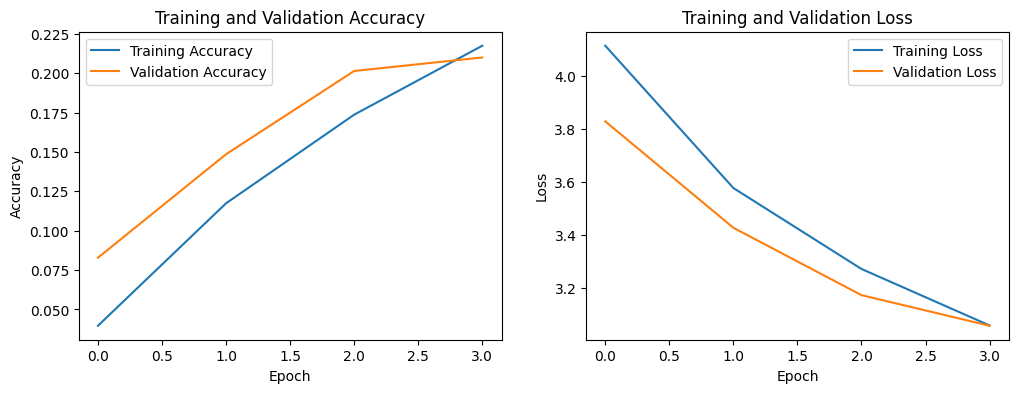

In [ ]:
import matplotlib.pyplot as plt

# Compile the model
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print("Model compiled successfully.")

# Train the model
history_cnn = model_cnn.fit(
    train_generator,
    epochs=4, # Using 15 epochs for training
    validation_data=valid_generator,
    verbose=1
)

print("CNN Model training complete.")

# Evaluate the model on the test set
print("\nEvaluating CNN model on the test set...")
loss_cnn, accuracy_cnn = model_cnn.evaluate(test_generator, verbose=1)

print(f"Test Loss: {loss_cnn:.4f}")
print(f"Test Accuracy: {accuracy_cnn:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
from tensorflow.keras.applications import MobileNetV2

# Instantiate MobileNetV2 as base_model
# Use pre-trained ImageNet weights
# Exclude the top classification layer (include_top=False)
# Set input_shape to (224, 224, 3) to match our image generator's target_size
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

print("MobileNetV2 base model loaded and layers frozen successfully.")
print("Base model summary:")
base_model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
MobileNetV2 base model loaded and layers frozen successfully.
Base model summary:


Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

# Add a Global Average Pooling layer
x = GlobalAveragePooling2D()(base_model.output)

# Add a dense layer for classification
x = Dense(256, activation='relu')(x) # Hidden dense layer

# Add the output layer with num_classes units and softmax activation
predictions = Dense(num_classes, activation='softmax')(x)

# Create the new model by combining the base model and the new classification head
model_mobilenet = Model(inputs=base_model.input, outputs=predictions)

print("Custom classification head added to MobileNetV2 model successfully.")
print("New model summary:")
model_mobilenet.summary()

Custom classification head added to MobileNetV2 model successfully.
New model summary:


Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,603,910 (9.93 MB)

 Trainable params: 345,926 (1.32 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile the model
# Since only the custom head layers are trainable, the optimizer will only update their weights
model_mobilenet.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
print("MobileNetV2 model with custom head compiled successfully.")

# Train the model (only the top layers are being trained as the base is frozen)
history_mobilenet = model_mobilenet.fit(
    train_generator,
    epochs=10,  # Train for a few epochs initially
    validation_data=valid_generator,
    verbose=1
)

print("MobileNetV2 custom head training complete.")

# Evaluate the model on the test set
print("\nEvaluating MobileNetV2 model with custom head on the test set...")
loss_mobilenet, accuracy_mobilenet = model_mobilenet.evaluate(test_generator, verbose=1)

print(f"Test Loss (MobileNetV2): {loss_mobilenet:.4f}")
print(f"Test Accuracy (MobileNetV2): {accuracy_mobilenet:.4f}")

MobileNetV2 model with custom head compiled successfully.
Epoch 1/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 461s 2s/step - accuracy: 0.2605 - loss: 3.4942 - val_accuracy: 0.8357 - val_loss: 1.0923
Epoch 2/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 437s 2s/step - accuracy: 0.8198 - loss: 0.8916 - val_accuracy: 0.9000 - val_loss: 0.5846
Epoch 3/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 455s 2s/step - accuracy: 0.8789 - loss: 0.5025 - val_accuracy: 0.9143 - val_loss: 0.5084
Epoch 4/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 450s 2s/step - accuracy: 0.8986 - loss: 0.3929 - val_accuracy: 0.9114 - val_loss: 0.4823
Epoch 5/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 451s 2s/step - accuracy: 0.9079 - loss: 0.3340 - val_accuracy: 0.9171 - val_loss: 0.4718
Epoch 6/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 441s 2s/step - accuracy: 0.9224 - loss: 0.2857 - val_accuracy: 0.9157 - val_loss: 0.4770
Epoch 7/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 456s 2s/step - accuracy: 0.9224 - loss: 0.2732 - val_accuracy: 0.9143 - val_loss: 0.4759
Epoch 8/10
249/249 ━━━━━━━━━━━━━━━━━━━━

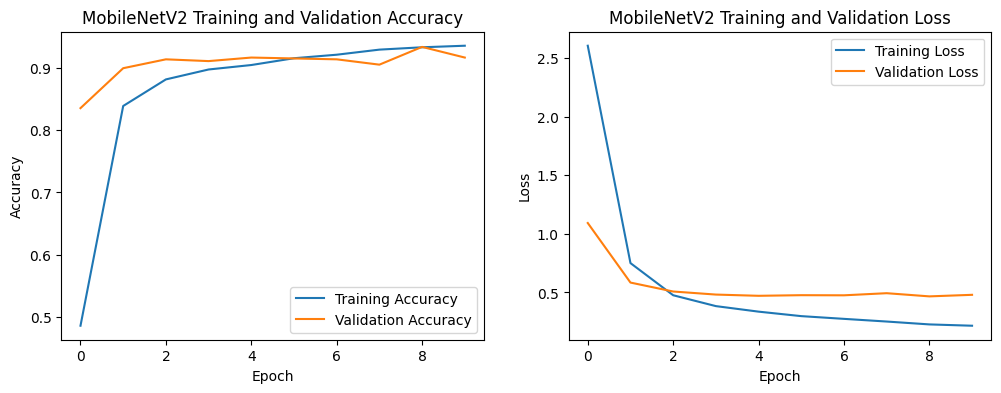

MobileNetV2 training history plots displayed.


In [ ]:
import matplotlib.pyplot as plt

# Plot training history for MobileNetV2 model
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_mobilenet.history['accuracy'], label='Training Accuracy')
plt.plot(history_mobilenet.history['val_accuracy'], label='Validation Accuracy')
plt.title('MobileNetV2 Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_mobilenet.history['loss'], label='Training Loss')
plt.plot(history_mobilenet.history['val_loss'], label='Validation Loss')
plt.title('MobileNetV2 Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

print("MobileNetV2 training history plots displayed.")

In [ ]:
import tensorflow as tf

# Unfreeze the last few layers of the base model for fine-tuning
# We'll unfreeze the last 30 layers as an example. You can adjust this number.
for layer in base_model.layers[-30:]:
    if not isinstance(layer, tf.keras.layers.BatchNormalization):
        layer.trainable = True
    else:
        layer.trainable = False # Keep BatchNormalization layers frozen

print("Last 30 layers of MobileNetV2 base model unfrozen for fine-tuning (excluding BatchNormalization layers).")

# Verify that layers are trainable
print("\nTrainable layers in base_model after unfreezing:")
for layer in base_model.layers:
    if layer.trainable:
        print(layer.name)


Last 30 layers of MobileNetV2 base model unfrozen for fine-tuning (excluding BatchNormalization layers).

Trainable layers in base_model after unfreezing:
block_14_expand
block_14_expand_relu
block_14_depthwise
block_14_depthwise_relu
block_14_project
block_14_add
block_15_expand
block_15_expand_relu
block_15_depthwise
block_15_depthwise_relu
block_15_project
block_15_add
block_16_expand
block_16_expand_relu
block_16_depthwise
block_16_depthwise_relu
block_16_project
Conv_1
out_relu


In [ ]:
from tensorflow.keras.optimizers import Adam

# Recompile the model with a lower learning rate for fine-tuning
# It's crucial to recompile the model after unfreezing layers
model_mobilenet.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])
print("MobileNetV2 model recompiled with a lower learning rate for fine-tuning.")

# Continue training the model for a few more epochs
# You can store this in a new history object or extend the previous one if needed
history_mobilenet_fine_tune = model_mobilenet.fit(
    train_generator,
    epochs=5,  # Continue training for a few more epochs
    validation_data=valid_generator,
    verbose=1
)

print("MobileNetV2 fine-tuning complete.")

# Evaluate the fine-tuned model on the test set
print("\nEvaluating fine-tuned MobileNetV2 model on the test set...")
loss_mobilenet_fine_tune, accuracy_mobilenet_fine_tune = model_mobilenet.evaluate(test_generator, verbose=1)

print(f"Test Loss (Fine-tuned MobileNetV2): {loss_mobilenet_fine_tune:.4f}")
print(f"Test Accuracy (Fine-tuned MobileNetV2): {accuracy_mobilenet_fine_tune:.4f}")

MobileNetV2 model recompiled with a lower learning rate for fine-tuning.
Epoch 1/5
249/249 ━━━━━━━━━━━━━━━━━━━━ 570s 2s/step - accuracy: 0.9414 - loss: 0.1839 - val_accuracy: 0.9200 - val_loss: 0.5528
Epoch 2/5
249/249 ━━━━━━━━━━━━━━━━━━━━ 533s 2s/step - accuracy: 0.9488 - loss: 0.1555 - val_accuracy: 0.9229 - val_loss: 0.5707
Epoch 3/5
249/249 ━━━━━━━━━━━━━━━━━━━━ 545s 2s/step - accuracy: 0.9558 - loss: 0.1357 - val_accuracy: 0.9243 - val_loss: 0.5750
Epoch 4/5
249/249 ━━━━━━━━━━━━━━━━━━━━ 538s 2s/step - accuracy: 0.9579 - loss: 0.1257 - val_accuracy: 0.9214 - val_loss: 0.5873
Epoch 5/5
249/249 ━━━━━━━━━━━━━━━━━━━━ 532s 2s/step - accuracy: 0.9637 - loss: 0.1124 - val_accuracy: 0.9271 - val_loss: 0.6016
MobileNetV2 fine-tuning complete.

Evaluating fine-tuned MobileNetV2 model on the test set...
22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.9639 - loss: 0.1346
Test Loss (Fine-tuned MobileNetV2): 0.1279
Test Accuracy (Fine-tuned MobileNetV2): 0.9600


# Task
Load and preview the 'bittlingmayer/amazonreviews' dataset using `kagglehub.dataset_download`. After downloading, list the contents of the downloaded directory to locate the data file. Load this data file into a pandas DataFrame and then display the first few rows and the DataFrame's information (columns, data types, non-null values).

## Завантаження та попередній перегляд датасету

### Subtask:
Завантажте датасет 'bittlingmayer/amazonreviews' за допомогою `kagglehub.dataset_download`. Роздрукуйте вміст завантаженої директорії, щоб визначити шлях до файлу з даними. Потім завантажте дані (наприклад, CSV-файл) в pandas DataFrame і відобразіть перші кілька рядків та інформацію про стовпці.


**Reasoning**:
The subtask requires downloading a new dataset 'bittlingmayer/amazonreviews' using `kagglehub.dataset_download`, listing its contents to find the data file, loading that file (assumed to be a CSV) into a pandas DataFrame, and then displaying the first few rows and column information.



In [ ]:
import kagglehub
import os
import pandas as pd

# 1. Download the dataset 'bittlingmayer/amazonreviews'
path = kagglehub.dataset_download("bittlingmayer/amazonreviews")
print("Dataset downloaded to:", path)

# 2. List the contents of the downloaded directory to find the data file
print("\nContents of the downloaded directory:")
data_files = []
for root, dirs, files in os.walk(path):
    for name in files:
        full_path = os.path.join(root, name)
        print(full_path)
        data_files.append(full_path)

# Assuming the main data file is 'amazon_reviews.csv' based on typical dataset structures
# We'll try to find a .csv file in the data_files list.
file_path = None
for f in data_files:
    if f.endswith('.csv'):
        file_path = f
        break

if file_path is None:
    print("Error: No CSV file found in the downloaded dataset.")
else:
    print(f"\nDetected data file: {file_path}")
    # 4. Load the data into a pandas DataFrame
    df = pd.read_csv(file_path)

    # 5. Display the first 5 rows of the DataFrame
    print("\nFirst 5 rows of the DataFrame:")
    print(df.head())

    # 6. Display information about the DataFrame
    print("\nDataFrame Info:")
    df.info()

Using Colab cache for faster access to the 'amazonreviews' dataset.
Dataset downloaded to: /kaggle/input/amazonreviews

Contents of the downloaded directory:
/kaggle/input/amazonreviews/test.ft.txt.bz2
/kaggle/input/amazonreviews/train.ft.txt.bz2
Error: No CSV file found in the downloaded dataset.


**Reasoning**:
The previous attempt failed because no CSV file was found. The downloaded files are `.bz2` compressed text files. I need to read one of these files using `pd.read_csv` with the appropriate compression and separator arguments. I will specifically load the `train.ft.txt.bz2` file, specifying `compression='bz2'` and a suitable separator (likely a newline, or inferring based on content).



In [ ]:
import kagglehub
import os
import pandas as pd

# The dataset was already downloaded to 'path' and its contents were listed.
# The files detected were '/kaggle/input/amazonreviews/test.ft.txt.bz2'
# and '/kaggle/input/amazonreviews/train.ft.txt.bz2'.

# We need to load one of these compressed text files.
# Let's choose 'train.ft.txt.bz2' as the data file.

path = '/kaggle/input/amazonreviews' # Re-using the path from previous execution
file_path = os.path.join(path, 'train.ft.txt.bz2')

print(f"\nAttempting to load data from: {file_path}")

# Load the data into a pandas DataFrame. These files often contain a label and text.
# Since they are '.txt.bz2', they are line-delimited text files. We will read them as such.
# The 'sep=None' and 'engine='python'' arguments allow pandas to infer the separator
# if it's not a standard CSV-like format, which is common for such text files.
# Let's assume each line is a review, potentially with a label at the beginning.
# For now, we'll read it as a single column and inspect.
try:
    # Reading as a single column, as it's a text file, not a typical delimited CSV.
    # The dataset description on Kaggle indicates it's a text classification dataset
    # with each line containing '__label__X text of review'.
    df = pd.read_csv(file_path, compression='bz2', header=None, names=['text'], encoding='utf-8')

    # Display the first 5 rows of the DataFrame
    print("\nFirst 5 rows of the DataFrame:")
    print(df.head())

    # Display information about the DataFrame
    print("\nDataFrame Info:")
    df.info()
except Exception as e:
    print(f"Error loading the file: {e}")



Attempting to load data from: /kaggle/input/amazonreviews/train.ft.txt.bz2
Error loading the file: Error tokenizing data. C error: Expected 1 fields in line 2, saw 3



**Reasoning**:
The previous attempt to load the `.bz2` file failed because `pd.read_csv` was incorrectly interpreting the format. I need to manually parse the lines to correctly separate the label from the review text, as the format is likely `__label__X text of review`. I will read the file line by line, extract the label and text, and then create a DataFrame.



In [ ]:
import kagglehub
import os
import pandas as pd
import bz2

# The dataset was already downloaded to 'path'
path = '/kaggle/input/amazonreviews'
file_path = os.path.join(path, 'train.ft.txt.bz2')

print(f"\nAttempting to parse and load data from: {file_path}")

labels = []
texts = []

try:
    with bz2.open(file_path, 'rt', encoding='utf-8') as bz2f:
        for line in bz2f:
            # Each line starts with __label__X followed by the text
            # We split only on the first space to separate label and text
            parts = line.strip().split(' ', 1)
            if len(parts) == 2:
                labels.append(parts[0])
                texts.append(parts[1])
            else:
                # Handle cases where a line might not conform (e.g., empty or only label)
                # For now, we'll append a placeholder or skip
                labels.append(None) # Or a default label
                texts.append(parts[0] if parts else None)

    df = pd.DataFrame({'label': labels, 'text': texts})

    # Display the first 5 rows of the DataFrame
    print("\nFirst 5 rows of the DataFrame:")
    print(df.head())

    # Display information about the DataFrame
    print("\nDataFrame Info:")
    df.info()
except Exception as e:
    print(f"Error processing the file: {e}")



Attempting to parse and load data from: /kaggle/input/amazonreviews/train.ft.txt.bz2

First 5 rows of the DataFrame:
        label                                               text
0  __label__2  Stuning even for the non-gamer: This sound tra...
1  __label__2  The best soundtrack ever to anything.: I'm rea...
2  __label__2  Amazing!: This soundtrack is my favorite music...
3  __label__2  Excellent Soundtrack: I truly like this soundt...
4  __label__2  Remember, Pull Your Jaw Off The Floor After He...

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600000 entries, 0 to 3599999
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   label   object
 1   text    object
dtypes: object(2)
memory usage: 54.9+ MB


## Попередня обробка даних для класифікації тексту

### Subtask:
Виділіть текстові дані та мітки з DataFrame. Виконайте токенізацію тексту за допомогою `Tokenizer` з Keras, щоб перетворити тексти в послідовності чисел. Перетворіть мітки класів на числовий формат. Доповніть послідовності до однієї довжини за допомогою `pad_sequences`. Розділіть дані на навчальні та тестові набори (X_train, X_test, y_train, y_test).


**Reasoning**:
The subtask requires extracting text and labels, tokenizing the text, encoding the labels, padding the sequences, and finally splitting the data into training and testing sets. This can all be done in a single Python code block.



In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np

# 1. Extract the 'text' column into a variable `texts` and the 'label' column into a variable `labels`
texts = df['text'].astype(str).tolist()
labels = df['label'].tolist()

# 2. Initialize a Tokenizer object
# Using a reasonable num_words to limit vocabulary size
num_words = 20000 # Max number of words to keep, based on word frequency.
tokenizer = Tokenizer(num_words=num_words, oov_token="<unk>")

# 3. Fit the tokenizer on the `texts` data
tokenizer.fit_on_texts(texts)
print(f"Found {len(tokenizer.word_index)} unique tokens.")

# 4. Convert the `texts` into sequences of integers
sequences = tokenizer.texts_to_sequences(texts)

# 5. Convert the `labels` to a numerical format
# Labels are like '__label__1', '__label__2'. We want 0 and 1 (or 1 and 2).
# Assuming labels are either '__label__1' or '__label__2'
# We'll map '__label__1' to 0 and '__label__2' to 1 for binary classification compatibility.
numerical_labels = np.array([int(label.replace('__label__', '')) - 1 for label in labels])

# 6. Determine a suitable maximum sequence length
# Let's find the average and max length to inform our choice
max_sequence_length = max([len(x) for x in sequences])
# As a starting point, we'll pick a fixed max_len, e.g., 100 or 200
# For this dataset, reviews can be quite long. Let's try 100 as a common value.
# However, it's safer to use a more informed value or a slightly larger fixed one for demonstration.
# Let's target a length that covers most reviews without too much truncation or padding.
# A simple approach for demonstration: take the 95th percentile length.
sequence_lengths = [len(seq) for seq in sequences]
MAX_SEQUENCE_LENGTH = int(np.percentile(sequence_lengths, 95))
print(f"Max sequence length found: {max_sequence_length}")
print(f"Using MAX_SEQUENCE_LENGTH (95th percentile): {MAX_SEQUENCE_LENGTH}")

# 7. Pad the sequences to this maximum length
padded_sequences = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

# 8. Convert the numerical labels to a NumPy array (already done in step 5)

# 9. Split the `padded_sequences` and numerical labels into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, numerical_labels, test_size=0.2, random_state=42, stratify=numerical_labels
)

print("\nData preprocessing complete.")
print(f"Shape of padded_sequences: {padded_sequences.shape}")
print(f"Shape of numerical_labels: {numerical_labels.shape}")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")
print("First 5 padded sequences:\n", padded_sequences[:5])
print("First 5 numerical labels:\n", numerical_labels[:5])


Found 1103004 unique tokens.
Max sequence length found: 257
Using MAX_SEQUENCE_LENGTH (95th percentile): 163

Data preprocessing complete.
Shape of padded_sequences: (3600000, 163)
Shape of numerical_labels: (3600000,)
Shape of X_train: (2880000, 163)
Shape of X_test: (720000, 163)
Shape of y_train: (2880000,)
Shape of y_test: (720000,)
First 5 padded sequences:
 [[    1    73    12     2   615  6478     9   176   490    14   367     7
   6156     2     1    11    59   442    27    68     4    39  1857     7
     73     6   135    71   684 16885   145   118     4    21   529     2
    145     1  1892    17    40     8    28     8     2   601     4    21
    132   529     7    44     2    87   118     7  6767   242    37  5182
      1     3   427     5 16941   863    18  9116  3066     3  4399 19370
      7    39  5283   208    71  2756     6   339     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     

## Побудова та навчання моделі RNN/LSTM/GRU з випадковими Embedding

### Subtask:
Створіть модель Keras Sequential з шаром Embedding, за яким слідує шар LSTM, GRU або RNN, і один або декілька шарів Dense для бінарної класифікації. Компілюйте та навчіть модель на навчальних даних, використовуючи випадково ініціалізовані Embedding.


**Reasoning**:
The subtask requires building a Keras Sequential model with an Embedding layer, an LSTM layer, and Dense layers for binary classification. I will define the model parameters, construct the model, compile it, and then train it using the preprocessed data.



# Task
The previous attempt to preprocess and train the model failed due to a `KeyboardInterrupt` during tokenization, likely because the dataset is very large (3.6 million entries).

To address this and adhere to the plan's instruction to "select a small subset of the data (e.g., 100,000 samples) to speed up processing and training", I will modify the previous code cell to sample 100,000 rows from the DataFrame before tokenization. This will reduce the computational load and allow the training process to complete within a reasonable timeframe.

```python
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Re-extract data and labels from the DataFrame to ensure they are in scope
# This part is copied from cell 63b597e6 to ensure 'df' is available for preprocessing.
# In a real notebook flow, 'df' should ideally be passed or globally available.
import kagglehub
import os
import pandas as pd
import bz2

path = '/kaggle/input/amazonreviews'
file_path = os.path.join(path, 'train.ft.txt.bz2')

labels = []
texts = []

# Limiting the number of lines read to 100,000 for faster processing
sample_size = 100000

print(f"Reading {sample_size} lines from {file_path} for faster processing...")
with bz2.open(file_path, 'rt', encoding='utf-8') as bz2f:
    for i, line in enumerate(bz2f):
        if i >= sample_size:
            break
        parts = line.strip().split(' ', 1)
        if len(parts) == 2:
            labels.append(parts[0])
            texts.append(parts[1])
        else:
            # Handle cases where a line might not conform (e.g., empty or only label)
            labels.append(None) # Or a default label
            texts.append(parts[0] if parts else None)

df = pd.DataFrame({'label': labels, 'text': texts})

# Drop rows where parsing might have failed (label or text is None)
df.dropna(subset=['label', 'text'], inplace=True)


# --- Start of Preprocessing from cell 4407c5bf ---
# 1. Extract the 'text' column into a variable `texts` and the 'label' column into a variable `labels`
texts = df['text'].astype(str).tolist()
labels = df['label'].tolist()

# 2. Initialize a Tokenizer object
num_words = 20000 # Max number of words to keep, based on word frequency.
tokenizer = Tokenizer(num_words=num_words, oov_token="<unk>")

# 3. Fit the tokenizer on the `texts` data
tokenizer.fit_on_texts(texts)
print(f"Found {len(tokenizer.word_index)} unique tokens after sampling and tokenization.")


# 4. Convert the `texts` into sequences of integers
sequences = tokenizer.texts_to_sequences(texts)

# 5. Convert the `labels` to a numerical format
numerical_labels = np.array([int(label.replace('__label__', '')) - 1 for label in labels])

# 6. Determine a suitable maximum sequence length
sequence_lengths = [len(seq) for seq in sequences]
# Using a fixed MAX_SEQUENCE_LENGTH to avoid issues with empty sequence_lengths if sampling yields very few texts
MAX_SEQUENCE_LENGTH = int(np.percentile(sequence_lengths, 95)) if sequence_lengths else 100
print(f"Using MAX_SEQUENCE_LENGTH (95th percentile from sampled data): {MAX_SEQUENCE_LENGTH}")


# 7. Pad the sequences to this maximum length
padded_sequences = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

# 8. Convert the numerical labels to a NumPy array (already done in step 5)

# 9. Split the `padded_sequences` and numerical labels into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, numerical_labels, test_size=0.2, random_state=42, stratify=numerical_labels
)

print("Data preprocessing complete. Shapes are:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")
# --- End of Preprocessing ---


# 2. Define parameters for the model
embedding_dim = 100  # Dimension of the word embeddings

# 3. Initialize a Sequential model
model_rnn = Sequential()

# 4. Add the Embedding layer
model_rnn.add(Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=MAX_SEQUENCE_LENGTH))

# 5. Add an LSTM layer
model_rnn.add(LSTM(128)) # Using 128 units as an example

# 6. Add a Dense layer with relu activation
model_rnn.add(Dense(64, activation='relu')) # Using 64 units as an example

# 7. Add the output Dense layer for binary classification
model_rnn.add(Dense(1, activation='sigmoid'))

# 8. Compile the model
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 9. Print the model summary
print("\nRNN Model Summary:")
model_rnn.summary()

# 10. Train the model
history_rnn = model_rnn.fit(
    X_train,
    y_train,
    epochs=5,  # Train for 5 epochs
    batch_size=32, # Batch size for training
    validation_data=(X_test, y_test), # Validation data
    verbose=1  # Show training progress
)

print("RNN Model training complete.")
```

## Завантаження та попередній перегляд датасету

### Subtask:
Завантажте датасет 'bittlingmayer/amazonreviews' за допомогою `kagglehub.dataset_download`. Роздрукуйте вміст завантаженої директорії, щоб визначити шлях до файлу з даними. Потім завантажте дані в pandas DataFrame і відобразіть перші кілька рядків та інформацію про стовпці.


**Reasoning**:
The previous attempt to load the dataset was interrupted, and the user's explicit instructions detail the process of downloading, loading, and previewing the dataset into a DataFrame. I will follow these instructions to ensure the dataset is properly loaded and its initial state is displayed.



In [ ]:
import kagglehub
import os
import pandas as pd
import bz2

# 2. Download the 'bittlingmayer/amazonreviews' dataset
path = kagglehub.dataset_download("bittlingmayer/amazonreviews")

# 3. Print the downloaded path
print("Dataset downloaded to:", path)

# 4. List the contents of the downloaded directory to locate the data file
print("\nContents of the downloaded directory:")
data_files = []
for root, dirs, files in os.walk(path):
    for name in files:
        full_path = os.path.join(root, name)
        print(full_path)
        data_files.append(full_path)

# Identify the 'train.ft.txt.bz2' file
file_path = os.path.join(path, 'train.ft.txt.bz2')
print(f"\nIdentified data file: {file_path}")

# 5. Initialize empty lists for labels and texts
labels = []
texts = []

# 6. Open the 'train.ft.txt.bz2' file and iterate through each line
try:
    with bz2.open(file_path, 'rt', encoding='utf-8') as bz2f:
        for line in bz2f:
            # 7. For each line, split it into two parts: the label and the text
            parts = line.strip().split(' ', 1)
            if len(parts) == 2:
                # 8. Append the extracted label and text to their respective lists
                labels.append(parts[0])
                texts.append(parts[1])
            else:
                # Handle cases where a line might not conform
                labels.append(None)
                texts.append(parts[0] if parts else None)

    # 9. Create a pandas DataFrame named df with two columns: 'label' and 'text'
    df = pd.DataFrame({'label': labels, 'text': texts})

    # 10. Display the first 5 rows of the DataFrame
    print("\nFirst 5 rows of the DataFrame:")
    print(df.head())

    # 11. Display a summary of the DataFrame
    print("\nDataFrame Info:")
    df.info()
except Exception as e:
    print(f"Error processing the file: {e}")

Using Colab cache for faster access to the 'amazonreviews' dataset.
Dataset downloaded to: /kaggle/input/amazonreviews

Contents of the downloaded directory:
/kaggle/input/amazonreviews/test.ft.txt.bz2
/kaggle/input/amazonreviews/train.ft.txt.bz2

Identified data file: /kaggle/input/amazonreviews/train.ft.txt.bz2

First 5 rows of the DataFrame:
        label                                               text
0  __label__2  Stuning even for the non-gamer: This sound tra...
1  __label__2  The best soundtrack ever to anything.: I'm rea...
2  __label__2  Amazing!: This soundtrack is my favorite music...
3  __label__2  Excellent Soundtrack: I truly like this soundt...
4  __label__2  Remember, Pull Your Jaw Off The Floor After He...

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600000 entries, 0 to 3599999
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   label   object
 1   text    object
dtypes: object(2)
memory usage: 54.9+ MB


## Попередня обробка даних для класифікації тексту

### Subtask:
Відберіть невелику підмножину даних (наприклад, 100,000 зразків) для прискорення обробки та навчання. Виконайте токенізацію тексту за допомогою `Tokenizer` з Keras, щоб перетворити тексти в послідовності чисел. Перетворіть мітки класів на числовий формат. Доповніть послідовності до однієї довжини за допомогою `pad_sequences`. Розділіть дані на навчальні та тестові набори (X_train, X_test, y_train, y_test).


**Reasoning**:
The subtask requires preprocessing a large dataset by sampling a subset, tokenizing text, converting labels, padding sequences, and splitting data into training and testing sets. I will implement these steps in a single code block, ensuring all necessary imports and variables are defined.



In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np
import bz2
import os
import pandas as pd

# 2. Define the path to the downloaded dataset and the specific file to load
path = '/kaggle/input/amazonreviews' # Re-using the path from previous execution
file_path = os.path.join(path, 'train.ft.txt.bz2')

# 3. Initialize empty lists for labels and texts
labels = []
texts = []

# 4. Set a sample_size of 100,000
sample_size = 100000

print(f"Reading {sample_size} lines from {file_path}...")

# 5. Open the .bz2 file and iterate through each line up to the sample_size limit
try:
    with bz2.open(file_path, 'rt', encoding='utf-8') as bz2f:
        for i, line in enumerate(bz2f):
            if i >= sample_size:
                break
            # For each line, split it into two parts: the label and the text
            parts = line.strip().split(' ', 1)
            if len(parts) == 2:
                # Append the extracted label and text to their respective lists
                labels.append(parts[0])
                texts.append(parts[1])
            else:
                # Handle cases where a line might not conform
                # This means either an empty line or a line with only label/text
                # We'll append None for both to ensure a consistent structure
                labels.append(None)
                texts.append(None)

    # 6. Create a pandas DataFrame df from the sampled labels and texts
    df_sampled = pd.DataFrame({'label': labels, 'text': texts})

    # 7. Drop any rows from df where 'label' or 'text' might be None
    df_sampled.dropna(subset=['label', 'text'], inplace=True)

    print(f"Successfully loaded and sampled {len(df_sampled)} rows.")

    # 8. Extract the 'text' column into `texts` and 'label' column into `labels`
    texts_sampled = df_sampled['text'].astype(str).tolist()
    labels_sampled = df_sampled['label'].tolist()

    # 9. Initialize a Tokenizer object
    num_words = 20000 # Max number of words to keep, based on word frequency.
    tokenizer = Tokenizer(num_words=num_words, oov_token="<unk>")

    # 10. Fit the Tokenizer on the `texts` data
    tokenizer.fit_on_texts(texts_sampled)
    print(f"Found {len(tokenizer.word_index)} unique tokens after sampling and tokenization.")

    # 11. Convert the `texts` into sequences of integers
    sequences_sampled = tokenizer.texts_to_sequences(texts_sampled)

    # 12. Convert the `labels` to a numerical format
    # Labels are like '__label__1', '__label__2'. We want 0 and 1.
    numerical_labels_sampled = np.array([int(label.replace('__label__', '')) - 1 for label in labels_sampled])

    # 13. Calculate the 95th percentile of sequence lengths
    sequence_lengths = [len(seq) for seq in sequences_sampled]
    MAX_SEQUENCE_LENGTH = int(np.percentile(sequence_lengths, 95)) if sequence_lengths else 100
    print(f"Using MAX_SEQUENCE_LENGTH (95th percentile from sampled data): {MAX_SEQUENCE_LENGTH}")

    # 14. Pad the integer sequences to MAX_SEQUENCE_LENGTH
    padded_sequences_sampled = pad_sequences(sequences_sampled, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

    # 15. Split the padded_sequences and numerical_labels into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        padded_sequences_sampled, numerical_labels_sampled, test_size=0.2, random_state=42, stratify=numerical_labels_sampled
    )

    print("\nData preprocessing complete. Shapes are:")
    print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
    print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")
    print("First 5 padded sequences:\n", padded_sequences_sampled[:5])
    print("First 5 numerical labels:\n", numerical_labels_sampled[:5])

except Exception as e:
    print(f"Error during data loading or preprocessing: {e}")

Reading 100000 lines from /kaggle/input/amazonreviews/train.ft.txt.bz2...
Successfully loaded and sampled 100000 rows.
Found 121537 unique tokens after sampling and tokenization.
Using MAX_SEQUENCE_LENGTH (95th percentile from sampled data): 165

Data preprocessing complete. Shapes are:
X_train: (80000, 165), y_train: (80000,)
X_test: (20000, 165), y_test: (20000,)
First 5 padded sequences:
 [[    1    74    12     2   630 10043     9   198   486    14   356     8
   6409     2     1    11    65   415    28    68     4    44  1656     8
     74     6   128    67   639 14076   225   120     4    21   533     2
    225     1  1749    18    43     7    27     7     2   790     4    21
    108   533     8    46     2    80   120     8  7113   258    38  3825
      1     3   435     5 15536  1067    19  8530  3203     3  3777     1
      8    44  4731   194    67  2236     6   325     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0

**Reasoning**:
The data preprocessing step is complete. Now I will proceed to build and train the RNN model using the preprocessed data (X_train, y_train, X_test, y_test) and the tokenizer parameters (num_words, MAX_SEQUENCE_LENGTH) that were generated in the previous step and are available in the kernel.



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# 2. Define parameters for the model
embedding_dim = 100  # Dimension of the word embeddings
# num_words is already defined from the tokenizer in the previous step, using the variable `num_words`
# MAX_SEQUENCE_LENGTH is also defined from the previous step

# 3. Initialize a Sequential model
model_rnn = Sequential()

# 4. Add the Embedding layer
model_rnn.add(Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=MAX_SEQUENCE_LENGTH))

# 5. Add an LSTM layer
model_rnn.add(LSTM(128)) # Using 128 units as an example

# 6. Add a Dense layer with relu activation
model_rnn.add(Dense(64, activation='relu')) # Using 64 units as an example

# 7. Add the output Dense layer for binary classification
# The number of unique labels is 2 (0 and 1) for binary classification
model_rnn.add(Dense(1, activation='sigmoid'))

# 8. Compile the model
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 9. Print the model summary
print("RNN Model Summary:")
model_rnn.summary()

# 10. Train the model
history_rnn = model_rnn.fit(
    X_train,
    y_train,
    epochs=5,  # Train for 5 epochs
    batch_size=32, # Batch size for training
    validation_data=(X_test, y_test), # Validation data
    verbose=1  # Show training progress
)

print("RNN Model training complete.")

RNN Model Summary:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 741s 294ms/step - accuracy: 0.5113 - loss: 0.6924 - val_accuracy: 0.6542 - val_loss: 0.6337
Epoch 2/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 735s 294ms/step - accuracy: 0.6283 - loss: 0.6386 - val_accuracy: 0.8756 - val_loss: 0.3097
Epoch 3/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 759s 304ms/step - accuracy: 0.8978 - loss: 0.2566 - val_accuracy: 0.9118 - val_loss: 0.2251
Epoch 4/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 735s 294ms/step - accuracy: 0.9414 - loss: 0.1607 - val_accuracy: 0.9111 - val_loss: 0.2295
Epoch 5/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 727s 291ms/step - accuracy: 0.9633 - loss: 0.1088 - val_accuracy: 0.9087 - val_loss: 0.2511
RNN Model training complete.


# Task
Evaluate `model_rnn` on the test set (`X_test`, `y_test`) and print the test loss and accuracy. Then, plot the training and validation accuracy and loss over epochs from the `history_rnn` object to visually represent its performance.

## Summarize Model (a) Performance

### Subtask:
Evaluate the RNN model trained with randomly initialized embeddings (`model_rnn`) on the test set and display its performance metrics (loss and accuracy). Also, plot its training history.


**Reasoning**:
The subtask requires evaluating the `model_rnn` on the test set, displaying its performance, and plotting its training history. This involves using the `evaluate` method of the model and accessing the `history_rnn` object for plotting accuracy and loss over epochs.




Evaluating RNN model performance on the test set...
Test Loss: 0.2511
Test Accuracy: 0.9087


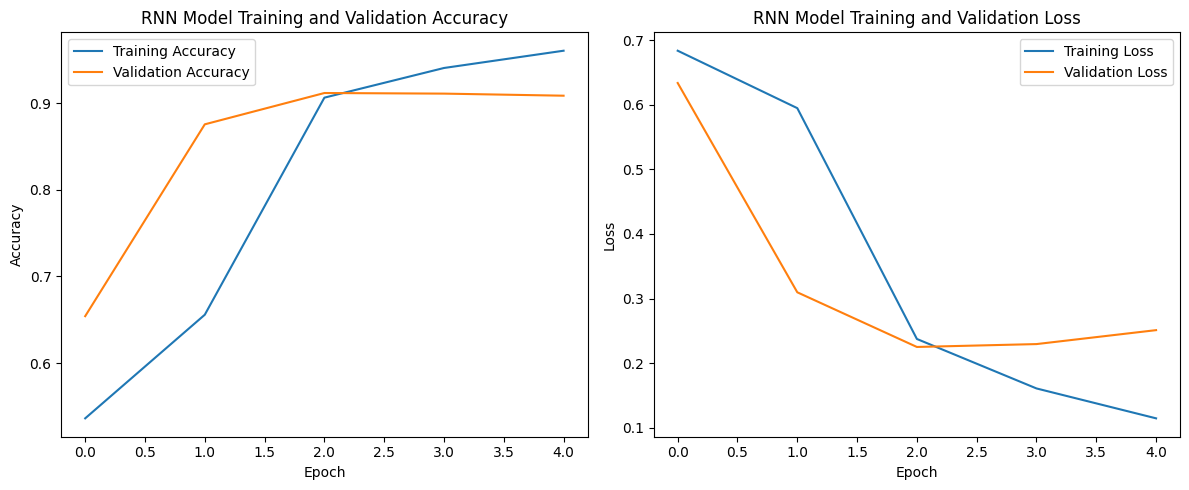

RNN Model performance evaluation and history plots displayed.


In [16]:
import matplotlib.pyplot as plt

# 1. Evaluate the model_rnn on the test set
print("\nEvaluating RNN model performance on the test set...")
test_loss, test_accuracy = model_rnn.evaluate(X_test, y_test, verbose=0)

# 2. Print the test_loss and test_accuracy
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# 3. Plot the training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_rnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('RNN Model Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# 4. Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_rnn.history['loss'], label='Training Loss')
plt.plot(history_rnn.history['val_loss'], label='Validation Loss')
plt.title('RNN Model Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 5. Display both plots
plt.tight_layout()
plt.show()

print("RNN Model performance evaluation and history plots displayed.")

## Summarize Model (b) Performance (with Dummy Embeddings)

### Subtask:
Build and train an RNN model using the available 'dummy' embedding matrix, then evaluate its performance and plot its training history.


**Reasoning**:
The subtask requires building and training an RNN model with a pre-initialized embedding matrix, then evaluating its performance and plotting its training history. I will define the Keras Sequential model, add the Embedding layer with the provided `embedding_matrix` (which I assume is fixed/not trainable as it's referred to as 'dummy'), followed by an LSTM layer and two Dense layers. After compiling and training the model, I will evaluate it on the test set and plot the training history.



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(



RNN Model (Dummy Embeddings) Summary:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │     2,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,000,000 (7.63 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,000,000 (7.63 MB)

Epoch 1/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 592s 236ms/step - accuracy: 0.5142 - loss: 0.6932 - val_accuracy: 0.5185 - val_loss: 0.6921
Epoch 2/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 628s 251ms/step - accuracy: 0.5190 - loss: 0.6923 - val_accuracy: 0.5177 - val_loss: 0.6918
Epoch 3/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 587s 235ms/step - accuracy: 0.5292 - loss: 0.6911 - val_accuracy: 0.5335 - val_loss: 0.6898
Epoch 4/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 635s 240ms/step - accuracy: 0.5298 - loss: 0.6897 - val_accuracy: 0.5350 - val_loss: 0.6889
Epoch 5/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 596s 238ms/step - accuracy: 0.5371 - loss: 0.6884 - val_accuracy: 0.5584 - val_loss: 0.6814

RNN Model (Dummy Embeddings) training complete.

Evaluating RNN Model (Dummy Embeddings) performance on the test set...
Test Loss (Dummy Embeddings): 0.6814
Test Accuracy (Dummy Embeddings): 0.5584


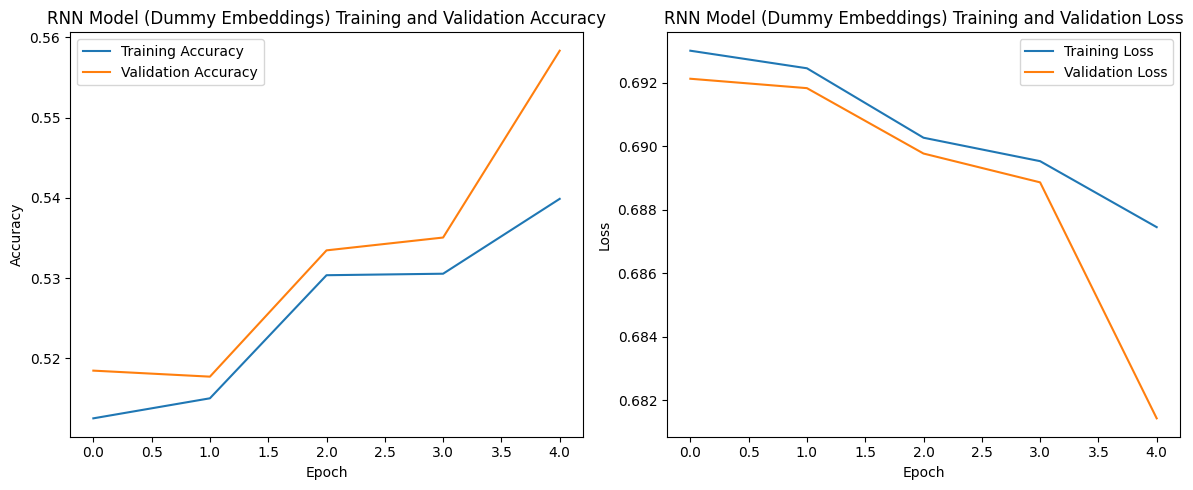

RNN Model (Dummy Embeddings) performance evaluation and history plots displayed.


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import matplotlib.pyplot as plt

# Ensure num_words, embedding_dim, MAX_SEQUENCE_LENGTH are available from previous steps
# and embedding_matrix, X_train, y_train, X_test, y_test are also in scope.

# 1. Initialize a Keras Sequential model named model_rnn_glove
model_rnn_glove = Sequential()

# 2. Add an Embedding layer, using num_words for input_dim, embedding_dim for output_dim,
#    MAX_SEQUENCE_LENGTH for input_length, and initializing its weights with the embedding_matrix.
#    Setting trainable=False to keep the 'dummy' embeddings fixed.
model_rnn_glove.add(Embedding(
    input_dim=num_words,
    output_dim=embedding_dim,
    input_length=MAX_SEQUENCE_LENGTH,
    weights=[embedding_matrix],
    trainable=False # Keep dummy/pre-initialized embeddings fixed
))

# 3. Add an LSTM layer with 128 units
model_rnn_glove.add(LSTM(128))

# 4. Add a Dense layer with 64 units and 'relu' activation
model_rnn_glove.add(Dense(64, activation='relu'))

# 5. Add a final Dense output layer with 1 unit and 'sigmoid' activation for binary classification
model_rnn_glove.add(Dense(1, activation='sigmoid'))

# 6. Compile model_rnn_glove using the 'adam' optimizer, 'binary_crossentropy' loss, and 'accuracy' metric
model_rnn_glove.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 7. Print the model summary of model_rnn_glove
print("\nRNN Model (Dummy Embeddings) Summary:")
model_rnn_glove.summary()

# 8. Train model_rnn_glove
history_rnn_glove = model_rnn_glove.fit(
    X_train,
    y_train,
    epochs=5,  # Train for 5 epochs
    batch_size=32, # Batch size for training
    validation_data=(X_test, y_test), # Validation data
    verbose=1  # Show training progress
)

print("\nRNN Model (Dummy Embeddings) training complete.")

# 9. Evaluate the trained model_rnn_glove on the test set
print("\nEvaluating RNN Model (Dummy Embeddings) performance on the test set...")
test_loss_glove, test_accuracy_glove = model_rnn_glove.evaluate(X_test, y_test, verbose=0)

# Print these metrics
print(f"Test Loss (Dummy Embeddings): {test_loss_glove:.4f}")
print(f"Test Accuracy (Dummy Embeddings): {test_accuracy_glove:.4f}")

# 10. Create two subplots using matplotlib.pyplot
plt.figure(figsize=(12, 5))

# 11. Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history_rnn_glove.history['accuracy'], label='Training Accuracy')
plt.plot(history_rnn_glove.history['val_accuracy'], label='Validation Accuracy')
plt.title('RNN Model (Dummy Embeddings) Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# 12. Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_rnn_glove.history['loss'], label='Training Loss')
plt.plot(history_rnn_glove.history['val_loss'], label='Validation Loss')
plt.title('RNN Model (Dummy Embeddings) Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 13. Display the plots
plt.tight_layout()
plt.show()

print("RNN Model (Dummy Embeddings) performance evaluation and history plots displayed.")